In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional.csv', sep= ';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [7]:
df['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [8]:
df['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

In [9]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [10]:
df['housing'].value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [11]:
df['loan'].value_counts()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64

In [12]:
df['contact'].value_counts()

cellular     2652
telephone    1467
Name: contact, dtype: int64

In [13]:
df['month'].value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: month, dtype: int64

In [14]:
df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [15]:
df['day_of_week'].value_counts()

thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64

In [16]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [17]:
x = df.drop(['y'],axis=1)
y = df['y']

In [18]:
kolom = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [19]:
#Memetakan setiap nilai menjadi sebuah angka
le = LabelEncoder()
x['job'] = le.fit_transform(x['job'])
x['marital'] = le.fit_transform(x['marital'])
x['education'] = le.fit_transform(x['education'])
x['default'] = le.fit_transform(x['default'])
x['housing'] = le.fit_transform(x['housing'])
x['loan'] = le.fit_transform(x['loan'])
x['contact'] = le.fit_transform(x['contact'])
x['month'] = le.fit_transform(x['month'])
x['poutcome'] = le.fit_transform(x['poutcome'])
x['day_of_week'] = le.fit_transform(x['day_of_week'])
y = le.fit_transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic Regression

In [21]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [22]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9085760517799353


In [24]:
matrix = confusion_matrix(y_test,y_pred)

In [25]:
matrix

array([[1069,   36],
       [  77,   54]], dtype=int64)

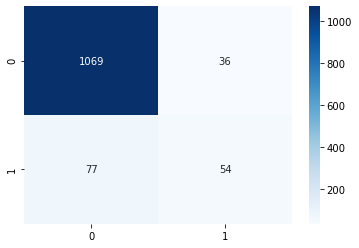

In [26]:
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1105
           1       0.60      0.41      0.49       131

    accuracy                           0.91      1236
   macro avg       0.77      0.69      0.72      1236
weighted avg       0.90      0.91      0.90      1236



# K-Nearest Neighbors

Text(0, 0.5, 'Error mean')

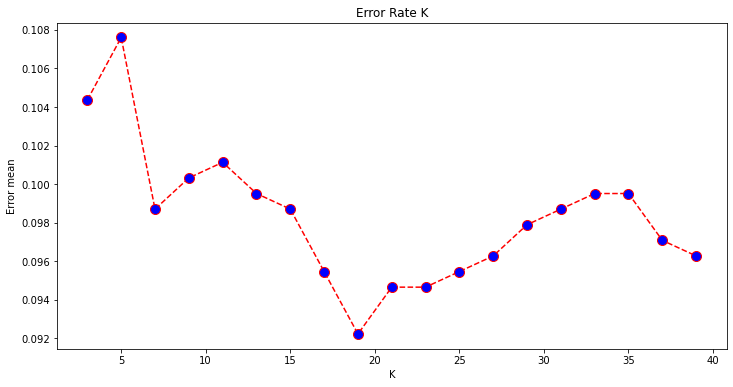

In [28]:
error = [] #membuat variable error 

# Menghitung error untuk k values antara 3 dan 40 dengan increment  = 2
for i in range(3, 40 , 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
#plotting Error Rate
plt.figure(figsize=(12, 6))  
plt.plot(range(3, 40 , 2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [29]:
#Membuat KNN Classifier
knn = KNeighborsClassifier(n_neighbors=19)

#Melatih model menggunakan training set
knn.fit(x_train, y_train)

#Memrediksi hasil untuk dataset test
y_pred = knn.predict(x_test)

In [30]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9077669902912622


# Support Vector Machine

In [32]:
#Membuat SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Melatih model menggunakan training set
clf.fit(x_train, y_train) 

#Memrediksi hasil untuk dataset test
y_pred = clf.predict(x_test)

In [33]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9101941747572816


# Decision Tree

In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [36]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9045307443365695


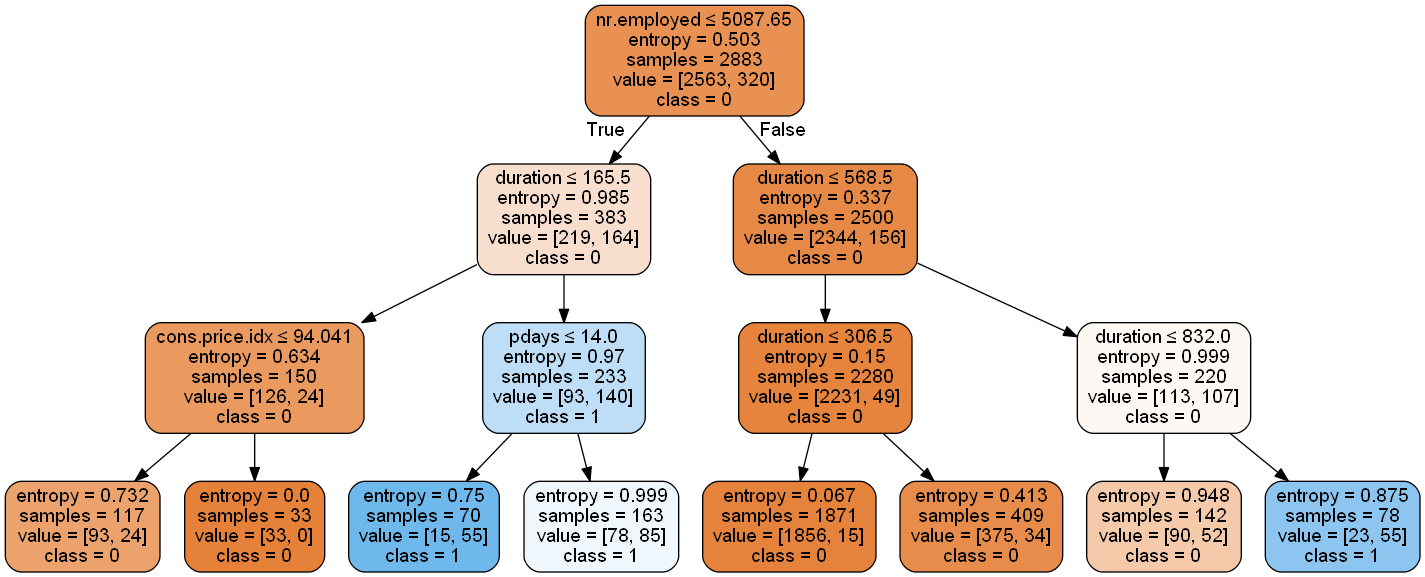

In [38]:
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=kolom, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

In [39]:
#Create Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model 
clf.fit(x_train,y_train) 

y_pred=clf.predict(x_test)

In [40]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9093851132686084


# Naive Bayes

In [42]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [43]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8470873786407767


Alasan menggunakan algoritma di atas adalah karena dataset yang digunakan mempunyai output berupa "yes" dan "no" yang mana untuk mengatasi kasus tersebut dibutuhkan metode classification. Algoritma di atas juga memiliki kecocokan yang baik dengan model, hal ini dapat dilihat dari akurasi tiap algoritma. masing-masing algoritma memiliki akurasi yang dapat dikatakan sangat baik yaitu di atas 80% 